<a href="https://colab.research.google.com/github/rcelebi/iswc2020-smarttask/blob/master/BERT_type_pred_dbpedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human numbers

In [ ]:
#!pip3 install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
#!pip3 install fastai --user

In [ ]:
!pip3 install fastai==1.0.61

In [ ]:
from fastai.text import *
#from fastai.text.all import *

In [ ]:
bs=64

## Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
path_to_ipynb = '/content/drive/My Drive/iswc-ammar/shervin'
# change directory to where autoregq.py, src, and data are
os.chdir(path_to_ipynb)

In [ ]:
import pandas as pd
import numpy as np
dbpedia_df = pd.read_json('data/smarttask_dbpedia_train.json')

In [ ]:
test_df= pd.read_json('data/smarttask_dbpedia_test_questions.json')

In [ ]:
test_df.head()

,id,question
0,dbpedia_16015,How many ingredients are in the grain} ?
1,dbpedia_3885,Is the case fatality rate of Fournier gangrene...
2,dbpedia_12907,Does the shelf life of spinach equal 8?
3,dbpedia_7955,What sound does a pig make in the French langu...
4,dbpedia_2376,When was Fergie completed his record label in ...


In [ ]:
#vq_test_df= pd.read_json('data/VQUANDA_train.json')

In [ ]:
#vq_test_df.head()

In [ ]:
answer_types = {}
for answers in dbpedia_df.type:
    for a in answers:
        if a in answer_types:
            answer_types[a]+=1
        else:
            answer_types[a]=1

def multitype_to_freqtype(type_list):
    for t in sorted(sorted_types, key=lambda item: item[1]):
        if sorted_types[t] < 1000: 
          if t in type_list:
              return t

    for t in sorted(sorted_types, key=lambda item: item[1]):
          if t in type_list:
              return t
    

def types_to_bottom_type(type_list):
    if len(type_list) == 0:
      return None 
    return type_list[0]


def types_to_top_type(type_list):
    if len(type_list) == 0:
      return None 
    return type_list[-1]
            
answ_df =pd.DataFrame.from_dict(answer_types, orient='index', columns=['Freq'])
sorted_types = answ_df.sort_values(by='Freq', ascending=False).to_dict()['Freq']

dbpedia_df['single_type'] =dbpedia_df.type.apply(multitype_to_freqtype)
dbpedia_df['bottom_level_type'] =dbpedia_df.type.apply(types_to_bottom_type)
dbpedia_df['top_level_type'] =dbpedia_df.type.apply(types_to_top_type)

In [ ]:
y= dbpedia_df[dbpedia_df.category == 'resource']
y[y.single_type.isna()]

,id,question,category,type,single_type,bottom_level_type,top_level_type
372,dbpedia_23441,In which time zone is Rome?,resource,[],None,None,None
724,dbpedia_23334,Give me all breeds of the German Shepherd dog.,resource,[],None,None,None
1091,dbpedia_23283,Where is the residence of the prime minister o...,resource,[],None,None,None
2398,dbpedia_23022,Which frequent flyer program has the most airl...,resource,[],None,None,None
5146,dbpedia_23526,What form of government does Russia have?,resource,[],None,None,None
6653,dbpedia_23146,Show me hiking trails in the Grand Canyon wher...,resource,[],None,None,None
7690,dbpedia_23152,Which instruments does Cat Stevens play?,resource,[],None,None,None
9476,dbpedia_23094,Whom did Lance Bass marry?,resource,[],None,None,None
10025,dbpedia_23514,What is the timezone in San Pedro de Atacama?,resource,[],None,None,None
10637,dbpedia_23494,Who designed the Brooklyn Bridge?,resource,[],None,None,None


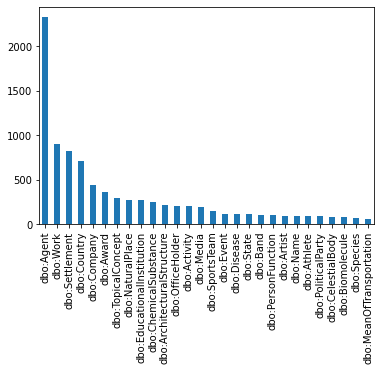

In [ ]:
x=  dbpedia_df[dbpedia_df.category == 'resource'].single_type.value_counts()
x[x>50].plot(kind='bar')

In [ ]:
sorted_types['dbo:Agent']

4183

In [ ]:
dbpedia_df= dbpedia_df[dbpedia_df.category.notna()]

In [ ]:
dbpedia_df[dbpedia_df['question'].isna()]

,id,question,category,type,single_type,bottom_level_type,top_level_type
242,dbpedia_7042,None,literal,[date],date,date,date
443,dbpedia_16956,None,resource,"[dbo:Village, dbo:Settlement, dbo:PopulatedPla...",dbo:Settlement,dbo:Village,dbo:Location
497,dbpedia_15803,None,literal,[date],date,date,date
775,dbpedia_440,None,literal,[date],date,date,date
1295,dbpedia_11926,None,literal,[date],date,date,date
1740,dbpedia_13826,None,literal,[date],date,date,date
2133,dbpedia_15458,None,literal,[date],date,date,date
2195,dbpedia_17058,None,literal,[date],date,date,date
2459,dbpedia_3072,None,resource,"[dbo:Village, dbo:Settlement, dbo:PopulatedPla...",dbo:Settlement,dbo:Village,dbo:Location
2584,dbpedia_95,None,literal,[date],date,date,date


In [ ]:
dbpedia_df[dbpedia_df['single_type'].isna()]

,id,question,category,type,single_type,bottom_level_type,top_level_type
372,dbpedia_23441,In which time zone is Rome?,resource,[],None,None,None
724,dbpedia_23334,Give me all breeds of the German Shepherd dog.,resource,[],None,None,None
1091,dbpedia_23283,Where is the residence of the prime minister o...,resource,[],None,None,None
2398,dbpedia_23022,Which frequent flyer program has the most airl...,resource,[],None,None,None
5146,dbpedia_23526,What form of government does Russia have?,resource,[],None,None,None
6653,dbpedia_23146,Show me hiking trails in the Grand Canyon wher...,resource,[],None,None,None
7690,dbpedia_23152,Which instruments does Cat Stevens play?,resource,[],None,None,None
9476,dbpedia_23094,Whom did Lance Bass marry?,resource,[],None,None,None
10025,dbpedia_23514,What is the timezone in San Pedro de Atacama?,resource,[],None,None,None
10637,dbpedia_23494,Who designed the Brooklyn Bridge?,resource,[],None,None,None


In [ ]:
dbpedia_df= dbpedia_df[dbpedia_df['single_type'].notna()]

In [ ]:
dbpedia_df.dropna( subset=['question'], inplace=True)

In [ ]:
dbpedia_df.head()

,id,question,category,type,single_type,bottom_level_type,top_level_type
0,dbpedia_1177,Was Jacqueline Kennedy Onassis a follower of M...,boolean,[boolean],boolean,boolean,boolean
1,dbpedia_14427,What is the name of the opera based on Twelfth...,resource,"[dbo:Opera, dbo:MusicalWork, dbo:Work]",dbo:Work,dbo:Opera,dbo:Work
2,dbpedia_16615,When did Lena Horne receive the Grammy Award f...,literal,[date],date,date,date
3,dbpedia_23480,Do Prince Harry and Prince William have the sa...,boolean,[boolean],boolean,boolean,boolean
4,dbpedia_3681,What is the subsidiary company working for Leo...,resource,"[dbo:EducationalInstitution, dbo:Organisation,...",dbo:EducationalInstitution,dbo:EducationalInstitution,dbo:Agent


In [ ]:
def extend_cat(row):
  if row['category'] =='boolean':
    return row['category']
  elif row['category'] == 'literal':
    return row['single_type']
  else:
    return row['category']


In [ ]:
dbpedia_df['extended_cat'] = dbpedia_df.apply(extend_cat, axis=1)

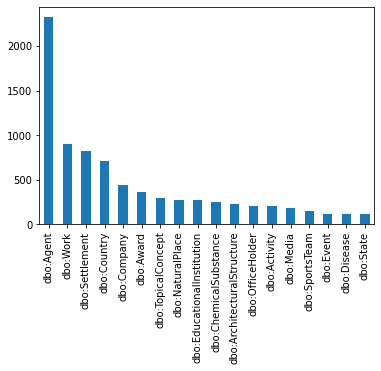

In [ ]:
dbpedia_res_df = dbpedia_df[dbpedia_df.category =='resource']
x= dbpedia_res_df.single_type.value_counts()
x[x>100].plot(kind='bar')

In [ ]:
df= dbpedia_res_df.assign(hash=dbpedia_res_df['type'].tolist()).explode('hash')

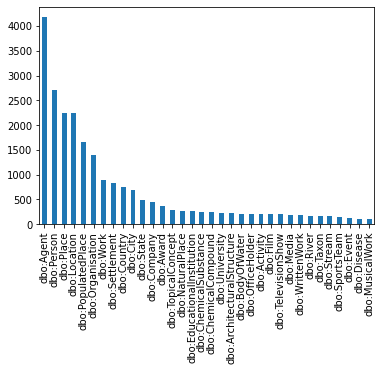

In [ ]:
x= df.hash.value_counts()
x[x>100].plot(kind='bar')

In [ ]:
len(x[x<10])/len(x)

0.4803921568627451

In [ ]:
fig= plt.figure(figsize=(40,14),dpi=300)
x= df.hash.value_counts()
x[x>100].plot(kind='bar', legend=False)

plt.title('Distribution of Answer Types', fontsize=50)
#plt.xlabel('Resource type', fontsize=56)
plt.xticks(fontsize=30)
plt.legend(fontsize=50)
plt.ylabel('Frequency',fontsize=50)
plt.yticks(fontsize=30)
plt.gca().get_legend().remove()
fig.savefig('frequency.png')

In [ ]:
VALIDATION_SPLIT = 0.2
indicies = np.arange(dbpedia_df.shape[0])
np.random.shuffle(indicies)
num_valid_samples = int(VALIDATION_SPLIT * dbpedia_df.shape[0])
num_valid_samples

3502

In [ ]:
num_test_samples=  int(num_valid_samples/2)

In [ ]:
dbpedia_df=dbpedia_df.iloc[indicies]

In [ ]:
train_df= dbpedia_df[:-num_valid_samples]
train_df.head()

,id,question,category,type,single_type,bottom_level_type,top_level_type,extended_cat
14770,dbpedia_7347,"Which is etymology of Planck length, that play...",resource,"[dbo:Person, dbo:Agent]",dbo:Agent,dbo:Person,dbo:Agent,resource
13472,dbpedia_1837,Is the flattening of the moon 0.00125?,boolean,[boolean],boolean,boolean,boolean,boolean
8650,dbpedia_10739,what is fairy tale contains the word witch in ...,resource,[dbo:Work],dbo:Work,dbo:Work,dbo:Work,resource
5038,dbpedia_15724,Who leads the Society of Jesus?,resource,"[dbo:Person, dbo:Agent]",dbo:Agent,dbo:Person,dbo:Agent,resource
5745,dbpedia_22387,Is the book The Buddha and his Dhamma a book a...,boolean,[boolean],boolean,boolean,boolean,boolean


In [ ]:
valid_df= dbpedia_df[-num_valid_samples:]
valid_df.head()

,id,question,category,type,single_type,bottom_level_type,top_level_type,extended_cat
9848,dbpedia_11835,Is Beijing a twinned administrative body with ...,boolean,[boolean],boolean,boolean,boolean,boolean
6113,dbpedia_7297,What was Jennifer Jones nominated for during t...,resource,[dbo:Award],dbo:Award,dbo:Award,dbo:Award,resource
2750,dbpedia_23238,When was Alberta admitted as province?,literal,[date],date,date,date,date
15731,dbpedia_1462,Which satellite orbits of Messier 22?,resource,"[dbo:Galaxy, dbo:CelestialBody, dbo:Place, dbo...",dbo:CelestialBody,dbo:Galaxy,dbo:Location,resource
7639,dbpedia_16690,What is the role played by City of Sydney whic...,resource,[dbo:Media],dbo:Media,dbo:Media,dbo:Media,resource


In [ ]:
len(valid_df)

3502

In [ ]:
valid_df.to_csv('/content/drive/My Drive/fastai-v3/data/smarttask/dbpedia_valid_gold.csv', index=False)

In [ ]:
#test_df= dbpedia_df[-num_test_samples:]
#test_df.head()

In [ ]:
len(valid_df)

3502

## Category Classification

## LSTM

In [ ]:
len(valid_df)

3502

In [ ]:
categories = list(dbpedia_df.extended_cat.unique())
data_cat = TextDataBunch.from_df('tmp', train_df=train_df,  valid_df=valid_df, test_df=test_df, text_cols=['question'], label_cols=['extended_cat'], classes=categories)

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
data_cat.show_batch()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


text,target
"xxbos xxmaj sovereignty has taken on a different meaning with the development of the principle of self - determination and the prohibition against the xxunk or use of force as xxunk xxunk xxunk of modern international law . xxmaj the xxmaj united xxmaj nations xxmaj xxunk , the xxmaj draft xxmaj declaration on xxmaj rights and xxmaj duties of xxmaj states , and the xxunk of regional international organizations express",resource
"xxbos xxmaj in 1874 the mcintosh family xxunk to 2 xxmaj xxunk xxmaj street , xxmaj xxunk , from which xxmaj william mcintosh rented part of the grounds of xxmaj xxunk xxmaj house . xxmaj there he xxunk flowers in which his family were xxunk to take an interest , the origin of xxmaj mackintosh 's life - long interest in botanical forms as a subject matter for the xxunk",string
"xxbos xxmaj the three connected movements use several xxunk new xxunk xxunk in their brief span — for example , the piano xxunk very xxunk after the opening of the first movement , with little of an xxunk xxunk to xxunk xxunk ] xxmaj the concerto xxunk xxunk xxunk , and contains many xxunk of xxunk , one of xxmaj xxunk 's specialities ; it is scored for 2 xxunk",resource
"xxbos xxmaj nathan xxmaj nandala xxmaj mafabi is a xxmaj xxunk accountant , lawyer , and politician . xxmaj he represents ... xxmaj nandala xxmaj mafabi . xxmaj from xxmaj wikipedia , the free encyclopedia . xxmaj jump to xxunk xxmaj jump to xxunk . xxmaj nandala xxmaj mafabi ... xxmaj residence , xxmaj kampala , xxmaj uganda . xxmaj nationality ... \n xxmaj missing : { ocean }",resource
xxbos xxmaj is it true that xxmaj larry xxmaj david was granted the xxmaj primetime xxmaj emmy xxmaj award for xxmaj outstanding xxmaj directing for a xxmaj comedy xxmaj series and the xxmaj screen xxmaj actors xxmaj guild xxmaj award for xxmaj outstanding xxmaj performance by an xxmaj ensemble in a xxmaj comedy xxmaj series ?,boolean


In [ ]:
cls1 = text_classifier_learner(data_cat, AWD_LSTM, bptt=10)
cls1.lr_find()




epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


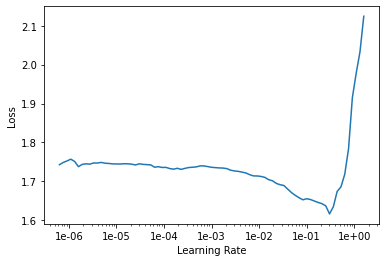

In [ ]:
cls1.recorder.plot() 

In [ ]:
cls1.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
#cls1.save('dbpedia_fit_head')

epoch,train_loss,valid_loss,accuracy,time
0,1.311399,1.291937,0.547687,00:07


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
#cls1.load('dbpedia_fit_head')
cls1.unfreeze()
cls1.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.681705,0.437624,0.890919,00:15
1,0.362110,0.300918,0.911479,00:16
2,0.265568,0.273939,0.926042,00:16
3,0.195343,0.226837,0.941462,00:16
4,0.144829,0.222788,0.942604,00:15


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
cls1.unfreeze()
cls1.fit_one_cycle(3, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.201758,0.337567,0.909766,00:15
1,0.177032,0.244966,0.929754,00:15
2,0.122614,0.220958,0.941176,00:16


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
#cls1.save_encoder('/content/drive/My Drive/fastai-v3/model/smarttask/dbpedia_cat_fit_c5')

In [ ]:
#cls1.load_encoder('/content/drive/My Drive/fastai-v3/model/smarttask/dbpedia_cat_fit_c5')

In [ ]:
len(test_df)

4381

In [ ]:
valid_df.head()

,id,question,category,type,single_type,specific_type,extended_cat
16545,dbpedia_918,How many people self-identify as Democrats?,literal,[number],number,number,number
504,dbpedia_6876,In what year did William Bateson give a Crooni...,literal,[date],date,date,date
10084,dbpedia_3530,Who is the contestant of Carl Gottlieb's work?,resource,"[dbo:Person, dbo:Agent]",dbo:Person,dbo:Person,resource
15396,dbpedia_7676,Which body regulates the Dutch language?,resource,"[dbo:Organisation, dbo:Agent]",dbo:Organisation,dbo:Organisation,resource
2186,dbpedia_8275,Was Lindsay Lohan born in The Bronx?,boolean,[boolean],boolean,boolean,boolean


In [ ]:
classes_t=[]
for i,row in test_df.sample(5).iterrows():
  p_ = cls1.predict(row['question'])
  #print (p_)
  #va = row['verbalized_answer']
  #s = va.find('[')
  #e = va.find(']')
  # ans =va[s:e+1]
  cls = int(p_[1])
  prob= p_[2]
  print (row['question'], '\n',':',categories[cls] )
  print ('Prob:',prob[cls])
  input('press for next')

SyntaxError: ignored

In [ ]:
data_cat.add_test(test_df)

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [ ]:
predictions, *_  = cls1.get_preds(DatasetType.Valid)
labels = np.argmax(predictions, 1)
valid_df['cat_pred'] = labels
valid_df.cat_pred= valid_df.cat_pred.replace({ i:c for i,c in enumerate(categories)})
valid_df.sample(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,id,question,category,type,single_type,specific_type,extended_cat,cat_pred
13226,dbpedia_6441,Is it true that the number of points/goals/set...,boolean,[boolean],boolean,boolean,boolean,boolean
14399,dbpedia_8277,Is the cruise speed of the Typhoon equal 1.5?,boolean,[boolean],boolean,boolean,boolean,boolean
17220,dbpedia_19629,How many schools have a bison as their mascot?,literal,[number],number,number,number,number
723,dbpedia_635,What is the unemployment rate of the candidate...,literal,[number],number,number,number,number
4235,dbpedia_12192,When did Leonidas of Rhodes receive the award ...,literal,[date],date,date,date,resource
2159,dbpedia_17247,Was Stan Lee born in Manhattan?,boolean,[boolean],boolean,boolean,boolean,boolean
9207,dbpedia_9465,Sputnik 1 has what orbital period?,literal,[number],number,number,number,resource
3306,dbpedia_5239,Is the autoignition temperature of the butan-1...,boolean,[boolean],boolean,boolean,boolean,boolean
8190,dbpedia_15918,How many networks air All My Children?,literal,[number],number,number,number,number
7744,dbpedia_12502,Who is the leader of the Mathematical Reviews ...,resource,"[dbo:Person, dbo:Agent]",dbo:Person,dbo:Person,resource,resource


In [ ]:
categories

['number', 'string', 'boolean', 'resource', 'date']

In [ ]:
valid_df.sample(5)

,id,question,category,type,single_type,specific_type,extended_cat,cat_pred
2117,dbpedia_16942,What is the ISTAT ID of Rimini?,literal,[string],string,string,string,string
6865,dbpedia_10606,Is 0 the length of the Kulin kamik?,boolean,[boolean],boolean,boolean,boolean,boolean
7111,dbpedia_10957,Which is Bugs! artist ID for France Gall?,literal,[string],string,string,string,string
6863,dbpedia_9163,Which country contained the library of the Rom...,resource,"[dbo:Library, dbo:EducationalInstitution, dbo:...",dbo:Organisation,dbo:Library,resource,resource
80,dbpedia_5047,Is the density of the water less than 1.169832?,boolean,[boolean],boolean,boolean,boolean,boolean


## Most frequent/generic type prediction

In [ ]:
len(dbpedia_df.top_level_type.unique())

47

In [ ]:
train_res_df= train_df[train_df.category =='resource']
valid_res_df= valid_df[valid_df.category =='resource']

In [ ]:
len(train_res_df), len(valid_res_df)

(7669, 1888)

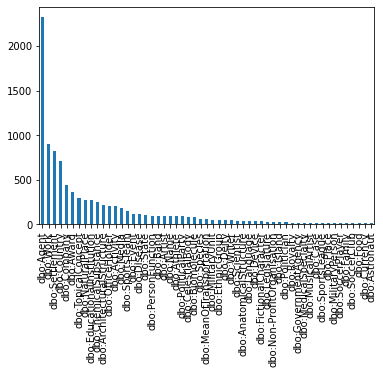

In [ ]:
dbpedia_res_df = dbpedia_df[dbpedia_df.category =='resource']
x= dbpedia_res_df.single_type.value_counts()
x[x>10].plot(kind='bar')

In [ ]:
df= dbpedia_res_df.assign(hash=dbpedia_res_df['type'].tolist()).explode('hash')

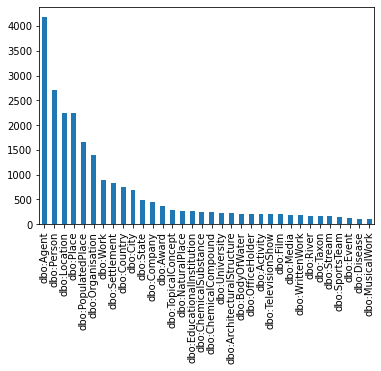

In [ ]:
x= df.hash.value_counts()
x[x>100].plot(kind='bar')

In [ ]:
type_hierarchy = {}
to_upper_class = {}
for i, row in dbpedia_res_df.type.iteritems():
    #print (row)
    types= list(row)
    for i in range(len(types)-1):
      parent = types[i]
      child = types[i+1]
      #print (parent, child) 
      if parent not in type_hierarchy:
          type_hierarchy[parent] = [child]
      else:
          type_hierarchy[parent].append(child)
          
      if child not in to_upper_class:
          to_upper_class[child] = parent

In [ ]:
def to_super_class(specific_type, type_with_less_freq):
    if specific_type in type_with_less_freq:
        if specific_type in to_upper_class:
            #if to_upper_class[specific_type] == 'owl:Thing':
            #   return specific_type
            return to_upper_class[specific_type]
    return specific_type

def to_sub_class(specific_type, type_with_less_freq):
    if specific_type in type_with_less_freq:
        if specific_type in to_upper_class:
            #if to_upper_class[specific_type] == 'owl:Thing':
            #   return specific_type
            return type_hierarchy[parent]
    return specific_type

def choose_freqent_types_balancing(specific_type, iters, min_freq):
    for i in range(iters):
        specific_type_freq = specific_type.value_counts()
        type_with_less_freq = list(specific_type_freq[specific_type_freq < min_freq].keys())
        specific_type = specific_type.apply(lambda x: to_super_class(x, type_with_less_freq) )
    return specific_type

def balance_types(specific_type, min_freq, max_freq):
    # slipt to super-classes if number of 
    
    specific_type_freq = specific_type.value_counts()
    max_freq =  specific_type_freq.sum() * 2  / len(specific_type_freq)
    type_with_most_freq = list(specific_type_freq[specific_type_freq > max_freq].keys())
    type_with_less_freq = list(specific_type_freq[specific_type_freq < min_freq].keys())
    
    specific_type = specific_type.apply(lambda x: to_super_class(x, type_with_less_freq) )


def choose_freqent_types_balancing(specific_type, iters, min_freq):
    for i in range(iters):
        specific_type_freq = specific_type.value_counts()
        type_with_less_freq = list(specific_type_freq[specific_type_freq < min_freq].keys())
        specific_type = specific_type.apply(lambda x: to_super_class(x, type_with_less_freq) )
    return specific_type  

In [ ]:
train_res_df['single_type'] =choose_freqent_types_balancing(train_res_df['single_type'], 50, 200)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


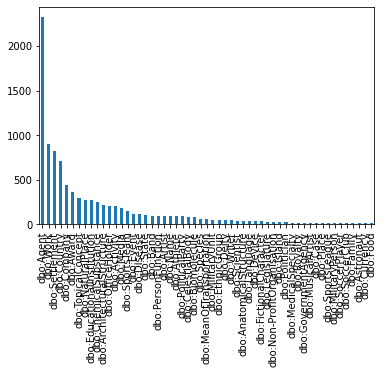

In [ ]:
x= dbpedia_res_df.single_type.value_counts()
x[x>10].plot(kind='bar')

### BERT Text Classifier


In [ ]:
import torch
from tqdm.notebook import tqdm

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.8MB 17.9MB/s 
     |████████████████████████████████| 890kB 58.9MB/s 
     |████████████████████████████████| 2.9MB 57.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=4d5ca0360c26bc01e95e86d63cf52c05859dcb15eeb647422a3bcee91a0e920d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    train_res_df.question.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    valid_res_df.question.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
encoded_data_train

{'input_ids': tensor([[ 101, 2029, 2003,  ...,    0,    0,    0],
        [ 101, 2054, 2003,  ...,    0,    0,    0],
        [ 101, 2040, 5260,  ...,    0,    0,    0],
        ...,
        [ 101, 2029, 2003,  ...,    0,    0,    0],
        [ 101, 2054, 2691,  ...,    0,    0,    0],
        [ 101, 2054, 2003,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:

label_dict = {}
for index, possible_label in enumerate(sorted(dbpedia_res_df.top_level_type.unique())):
    label_dict[possible_label] = index
label_dict


{'dbo:Activity': 0,
 'dbo:Agent': 1,
 'dbo:AnatomicalStructure': 2,
 'dbo:Award': 3,
 'dbo:BaseballTeam': 4,
 'dbo:Biomolecule': 5,
 'dbo:ChemicalSubstance': 6,
 'dbo:City': 7,
 'dbo:CollegeCoach': 8,
 'dbo:Country': 9,
 'dbo:Currency': 10,
 'dbo:Device': 11,
 'dbo:Disease': 12,
 'dbo:EthnicGroup': 13,
 'dbo:Event': 14,
 'dbo:Flag': 15,
 'dbo:Food': 16,
 'dbo:Holiday': 17,
 'dbo:HorseRace': 18,
 'dbo:Language': 19,
 'dbo:Location': 20,
 'dbo:MeanOfTransportation': 21,
 'dbo:Media': 22,
 'dbo:MedicalSpecialty': 23,
 'dbo:MountainRange': 24,
 'dbo:Museum': 25,
 'dbo:MusicalArtist': 26,
 'dbo:Name': 27,
 'dbo:OfficeHolder': 28,
 'dbo:Person': 29,
 'dbo:PersonFunction': 30,
 'dbo:PoliticalParty': 31,
 'dbo:PublicService': 32,
 'dbo:RecordLabel': 33,
 'dbo:River': 34,
 'dbo:SoccerClub': 35,
 'dbo:SoccerPlayer': 36,
 'dbo:Species': 37,
 'dbo:TimePeriod': 38,
 'dbo:TopicalConcept': 39,
 'dbo:UnitOfWork': 40,
 'dbo:University': 41,
 'dbo:Work': 42}

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_res_df.top_level_type.replace(label_dict).values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor( valid_res_df.top_level_type.replace(label_dict).values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')


def accuracy(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    acc =accuracy_score(labels_flat, preds_flat)
    print(f'Accuracy: {acc}\n')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
device = "cuda:0"
model = model.to(device)


In [ ]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'/content/drive/MyDrive/fastai-v3/model/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    val_acc = accuracy(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    tqdm.write(f'Accuracy : {val_acc}')


Epoch 1
Training loss: 1.265363119108443
Accuracy: 0.7886652542372882

Validation loss: 0.9415830783146832
F1 Score (Weighted): 0.7678002473048775
Accuracy : None



Epoch 2
Training loss: 0.7084937061102661
Accuracy: 0.8294491525423728

Validation loss: 0.878102537716872
F1 Score (Weighted): 0.8185649443072931
Accuracy : None



Epoch 3
Training loss: 0.4837328907566096
Accuracy: 0.8442796610169492

Validation loss: 0.9008210155477244
F1 Score (Weighted): 0.8380134395282143
Accuracy : None



Epoch 4
Training loss: 0.34932917219419674
Accuracy: 0.8463983050847458

Validation loss: 0.9254621068174611
F1 Score (Weighted): 0.8423753884552714
Accuracy : None



Epoch 5
Training loss: 0.2743332414796971
Accuracy: 0.846927966101695

Validation loss: 0.9529916709707495
F1 Score (Weighted): 0.8428950072075448
Accuracy : None



In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
model.to(device)

model.load_state_dict(torch.load('/content/drive/MyDrive/fastai-v3/model/finetuned_BERT_epoch_5.model', map_location=torch.device('cpu')))


<All keys matched successfully>

In [ ]:
_, predictions, true_vals = evaluate(dataloader_validation)
accuracy(predictions, true_vals)

Accuracy: 0.4258474576271186



## FastAI Text Classfier

In [ ]:
#types = list(dbpedia_df.single_type.unique())
types = list(dbpedia_df.top_level_type.unique())
data_cls = TextDataBunch.from_df('tmp', train_df=train_res_df,  valid_df=valid_res_df, text_cols=['question'], label_cols=['top_level_type'], classes=types)

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
cls2 = text_classifier_learner(data_cls, AWD_LSTM, bptt=10)
cls2.lr_find()


epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


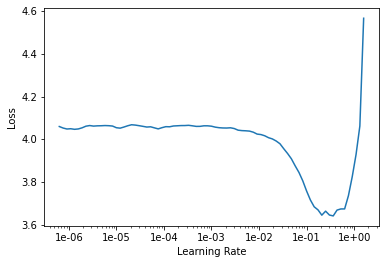

In [ ]:
cls2.recorder.plot()

In [ ]:
cls2.fit_one_cycle(3, 1e-1, moms=(0.8,0.7))
#cls2.save('dbpedia_type_fit_head')

epoch,train_loss,valid_loss,accuracy,time
0,2.135772,1.950933,0.443310,00:04
1,1.984781,1.903759,0.443310,00:04
2,1.934530,1.882881,0.443310,00:04


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
#cls2.load('dbpedia_type_fit_head')
cls2.unfreeze()
cls2.fit_one_cycle(10, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.698171,1.157942,0.721118,00:09
1,0.724872,1.289943,0.715744,00:09
2,0.805642,52.822258,0.558302,00:09
3,0.794147,1.348935,0.707684,00:09
4,0.808023,1.280396,0.704997,00:09
5,0.757740,1.242216,0.721655,00:09
6,0.714974,1.222810,0.707684,00:09
7,0.685512,1.228065,0.710371,00:09
8,0.650625,1.186958,0.718431,00:09
9,0.641674,1.215304,0.720580,00:08


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
#cls2.save('dbpedia_type_fit_c5')

In [ ]:
#cls2.load('dbpedia_type_fit_c5')
cls2.unfreeze()
cls2.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.770153,1.945938,0.691867,00:09
1,0.791220,1.352582,0.703337,00:09
2,0.781854,1.643510,0.701773,00:09
3,0.756686,1.308484,0.702294,00:09
4,0.747596,1.581043,0.698644,00:09


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
#cls2.save_encoder('/content/drive/My Drive/fastai-v3/model/smarttask/dbpedia_resource_type_fit_c15')

In [ ]:
cls2.show_results(ds_type=DatasetType.Valid)

text,target,prediction
"xxbos xxmaj xxunk xxmaj xxunk and xxmaj fred xxmaj xxunk , is a xxunk xxunk and the main xxunk of the a xxmaj xxunk on xxmaj xxunk xxmaj street series . a family man on the surface , xxmaj xxunk was xxunk the xxunk xxunk known as the "" xxmaj xxunk xxmaj xxunk "" . xxmaj when he was xxunk and xxunk released on a xxunk , the parents of",dbo:Place,dbo:Agent
"xxbos ( xxmaj spanish : xxmaj xxunk xxup ii ; 21 xxmaj may xxunk xxunk 13 xxmaj september xxunk ) was xxmaj king of xxmaj xxunk ] ( xxunk ) , xxmaj king of xxmaj portugal ( xxunk , as xxmaj philip i , xxmaj xxunk xxup xxunk ] xxmaj king of xxmaj naples and xxmaj xxunk ( both from xxunk ) , and xxunk xxunk xxmaj king of xxmaj",dbo:Agent,dbo:Place
xxbos xxmaj what is the name of the publishing house that published the journal of the xxmaj once - daily xxunk administration for xxunk - associated xxunk xxunk xxmaj staphylococcus aureus in an in xxunk xxunk model : xxunk xxunk for the xxunk for xxunk xxunk index ?,dbo:Agent,dbo:Agent
xxbos xxup which xxup is xxup the xxup minor xxup basilica xxup that xxup architectural xxup style xxup xxunk xxup architecture xxup and xxup which xxup contains xxup the xxup word xxup xxunk xxup in xxup their xxup name,dbo:Place,dbo:Place
"xxbos xxmaj who was the inventor of the b - tree , who was awarded the xxmaj officer 's xxmaj cross of the xxmaj order of xxmaj xxunk of the xxmaj federal xxmaj republic of xxmaj germany ?",dbo:Agent,dbo:Agent


In [ ]:
#test_df = pd.read_csv('/content/drive/My Drive/fastai-v3/data/smarttask/dbpedia_test_predictions.csv')
valid_df.head()

,id,question,category,type,single_type,specific_type,extended_cat,cat_pred
3633,dbpedia_8111,Which is FamilySearch person ID for Stephen Pa...,literal,[string],string,string,string,string
1272,dbpedia_11965,who member of played by of The Blue Ridge Ran...,resource,"[dbo:Band, dbo:Group, dbo:Organisation, dbo:Ag...",dbo:Agent,dbo:Band,resource,resource
17495,dbpedia_13067,What is the Class IIIA combustible liquid with...,resource,"[dbo:ChemicalCompound, dbo:ChemicalSubstance]",dbo:ChemicalSubstance,dbo:ChemicalCompound,resource,resource
4583,dbpedia_10617,Which is the INRAN Italian Food ID for peanut ...,literal,[string],string,string,string,string
9414,dbpedia_5514,What is the age of the oldest person to have a...,resource,[dbo:Award],dbo:Award,dbo:Award,resource,number


In [ ]:
type_preds, *_  = cls2.get_preds(DatasetType.Valid)
type_labels = np.argmax(type_preds, 1)

In [ ]:
valid_res_df.head()

,id,question,category,type,single_type,specific_type,extended_cat,cat_pred
1272,dbpedia_11965,who member of played by of The Blue Ridge Ran...,resource,"[dbo:Band, dbo:Group, dbo:Organisation, dbo:Ag...",dbo:Agent,dbo:Band,resource,resource
17495,dbpedia_13067,What is the Class IIIA combustible liquid with...,resource,"[dbo:ChemicalCompound, dbo:ChemicalSubstance]",dbo:ChemicalSubstance,dbo:ChemicalCompound,resource,resource
9414,dbpedia_5514,What is the age of the oldest person to have a...,resource,[dbo:Award],dbo:Award,dbo:Award,resource,number
7188,dbpedia_20642,Who are some US colonels?,resource,"[dbo:MilitaryPerson, dbo:Person, dbo:Agent]",dbo:Agent,dbo:MilitaryPerson,resource,resource
13577,dbpedia_20171,Who preceded Lucius Crus as an office holder?,resource,"[dbo:OfficeHolder, dbo:Person, dbo:Agent]",dbo:Agent,dbo:OfficeHolder,resource,resource


In [ ]:
type_labels = type_labels.numpy()

In [ ]:
type_labels

array([ 2,  9,  6,  2, ...,  2,  2, 10,  2])

In [ ]:
!pip install pycm

     |████████████████████████████████| 71kB 3.9MB/s 
     |████████████████████████████████| 573kB 7.8MB/s 


In [ ]:
from pycm import *
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cm = ConfusionMatrix(y_actu, type_labels)

In [ ]:
len(type_labels)

1942

In [ ]:
valid_res_df['type_pred'] = type_labels
valid_res_df.type_pred= valid_res_df.type_pred.replace({ i:c for i,c in enumerate(types)})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
valid_res_df.cat_pred.unique()

array(['resource', 'number', 'string', 'date', 'boolean'], dtype=object)

In [ ]:
valid_res_df.single_type

1272                 dbo:Agent
17495    dbo:ChemicalSubstance
9414                 dbo:Award
7188                 dbo:Agent
13577                dbo:Agent
                 ...          
11834             dbo:Language
13900             dbo:Activity
7378                  dbo:Work
5733                dbo:Device
15842                dbo:Agent
Name: single_type, Length: 1936, dtype: object

In [ ]:
cm = ConfusionMatrix(valid_res_df.single_type.to_list(), valid_res_df.type_pred.to_list())

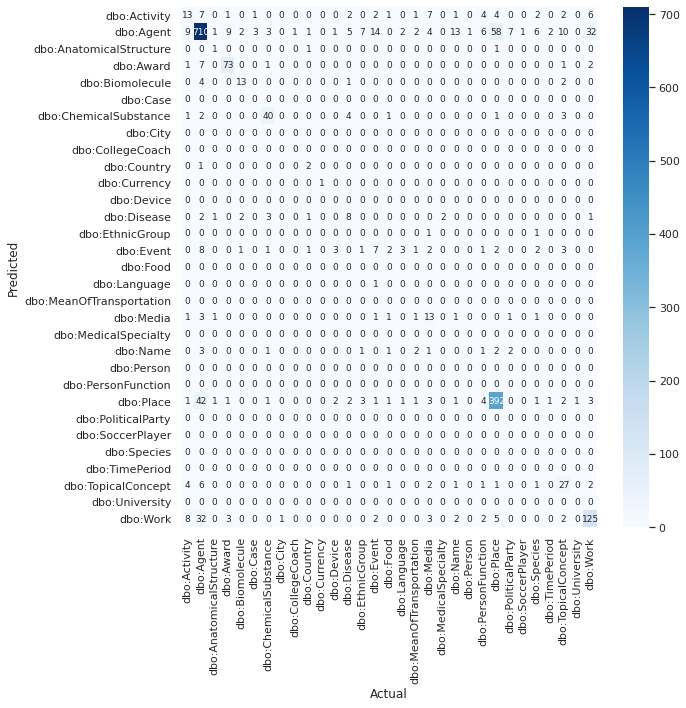

In [ ]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10,10))
ax= sns.heatmap(pd.DataFrame(cm.table), annot=True, annot_kws={"size": 9}, fmt='d', cmap="Blues")
#plt.xlabel('Experts'); plt.ylabel('Workers');
ax.set_xlabel('Actual');ax.set_ylabel('Predicted'); 
plt.tight_layout()
plt.show()
#ax.get_figure().savefig('worker_vs_expert.png', dpi=200)

In [ ]:
valid_df['type_pred'] = valid_df['cat_pred']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
len(valid_df)

3502

In [ ]:
valid_df.head(5)


,id,question,category,type,single_type,specific_type,extended_cat,cat_pred,type_pred
3732,dbpedia_11605,What is autoignition temperature for acetic ac...,literal,[number],number,number,number,number,number
14314,dbpedia_8258,What ideology do the members of Patrick Harrin...,resource,"[dbo:Ideology, dbo:TopicalConcept]",dbo:TopicalConcept,dbo:Ideology,resource,resource,resource
6732,dbpedia_5414,How many architectural styles are detectable i...,literal,[number],number,number,number,number,number
10619,dbpedia_15244,What did Samuel's students study?,resource,"[dbo:WrittenWork, dbo:Work]",dbo:Work,dbo:WrittenWork,resource,resource,resource
1751,dbpedia_2237,To whom did Ingmar Bergman got married and whe...,resource,"[dbo:Person, dbo:Agent]",dbo:Agent,dbo:Person,resource,resource,resource


In [ ]:
valid_res_df.head(2)

,id,question,category,type,single_type,specific_type,extended_cat,cat_pred,type_pred
1272,dbpedia_11965,who member of played by of The Blue Ridge Ran...,resource,"[dbo:Band, dbo:Group, dbo:Organisation, dbo:Ag...",dbo:Agent,dbo:Band,resource,resource,dbo:Agent
17495,dbpedia_13067,What is the Class IIIA combustible liquid with...,resource,"[dbo:ChemicalCompound, dbo:ChemicalSubstance]",dbo:ChemicalSubstance,dbo:ChemicalCompound,resource,resource,dbo:ChemicalSubstance


In [ ]:
valid_res_df.to_csv('/content/drive/My Drive/fastai-v3/data/smarttask/dbpedia_valid_type_predictions.csv', index=False)

In [ ]:
for i,row in valid_res_df.iterrows():
  index =np.where(valid_df['id']==row['id'])
  #print(row['id'])
  valid_df.iloc[index[0][0]]['type_pred'] = row['type_pred']

In [ ]:
#np.where(valid_df['id']=='dbpedia_6839') 
#valid_df[valid_df =='dbpedia_6839']

(array([0]),)

In [ ]:
valid_df.sample(10)

,id,question,category,type,single_type,specific_type,extended_cat,cat_pred,type_pred
961,dbpedia_19540,Over what do Concor holdings have a bridge?,resource,"[dbo:River, dbo:Stream, dbo:BodyOfWater, dbo:N...",dbo:Place,dbo:River,resource,resource,dbo:Place
9066,dbpedia_7698,What is the name of the mascot bulldog of Geor...,resource,"[dbo:Animal, dbo:Eukaryote, dbo:Species]",dbo:Species,dbo:Animal,resource,resource,dbo:Agent
14316,dbpedia_11064,I'd like to know the Rangpur Division's Bangla...,literal,[string],string,string,string,string,string
5002,dbpedia_19082,How many titles have been won by the beauty qu...,literal,[number],number,number,number,number,number
556,dbpedia_2830,Is the electronegativity of the sodium less th...,boolean,[boolean],boolean,boolean,boolean,boolean,boolean
2933,dbpedia_16096,"Who heads the Library of Congress, who is also...",resource,"[dbo:Person, dbo:Agent]",dbo:Agent,dbo:Person,resource,resource,dbo:Agent
14000,dbpedia_18188,What are some scientists who have stateless ci...,resource,"[dbo:Scientist, dbo:Person, dbo:Agent]",dbo:Agent,dbo:Scientist,resource,resource,dbo:Agent
5269,dbpedia_22607,On which river are there things belonging to z...,resource,"[dbo:River, dbo:Stream, dbo:BodyOfWater, dbo:N...",dbo:Place,dbo:River,resource,resource,dbo:Place
672,dbpedia_2956,When was the Old City of Jerusalem created in ...,literal,[date],date,date,date,date,date
15119,dbpedia_10121,Who is Dolley Madison's mother?,resource,"[dbo:Person, dbo:Agent]",dbo:Agent,dbo:Person,resource,resource,dbo:Agent


In [ ]:
valid_df.cat_pred.unique()

array(['resource', 'boolean', 'date', 'string', 'number'], dtype=object)

In [ ]:
valid_pred_df =valid_df[['id','question','cat_pred','type_pred']]
valid_pred_df.cat_pred = valid_pred_df.cat_pred.map({'string':'literal','date':'literal','number':'literal','boolean':'boolean','resource':'resource'})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
valid_pred_df.rename(columns={'cat_pred':'category','type_pred':'type'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
valid_pred_df.to_csv('/content/drive/My Drive/fastai-v3/data/smarttask/dbpedia_valid_predictions.csv', index=False)

In [ ]:
valid_pred_df.head()

,id,question,category,type
412,dbpedia_6839,Which films did screenwriter Andrew Lloyd Webb...,resource,dbo:Work
6463,dbpedia_10149,Is the periapsis of the 2202 Pele equal to 1.1...,boolean,boolean
13898,dbpedia_16693,which position did Radomir Putnik hold and whe...,literal,date
1886,dbpedia_6577,"Where is etymology of Poisson distribution, wi...",resource,dbo:Agent
7441,dbpedia_11113,Did Spirited Away include the voice actors Mar...,boolean,boolean


In [ ]:
def to_list(a):
  return [a]
valid_pred_df['type'] = valid_pred_df['type'].apply(to_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
valid_pred_df.to_json('/content/drive/My Drive/fastai-v3/data/smarttask/dbpedia_valid_predictions.json',orient='records')

In [ ]:
valid_df[['category','type','question','id']].to_json('/content/drive/My Drive/fastai-v3/data/smarttask/dbpedia_valid_gold.json', orient='records')